# 🌳 Sesión 02: Algoritmos No Lineales - Del Árbol al Bosque

> **Módulo:** Machine Learning Supervisado | **PECD - UNI**  
> **Notebook 01:** Visualización de Fronteras de Decisión

## 📑 Índice de Contenidos
1. [El Problema de la Linealidad](#1.-El-Problema-de-la-Linealidad) 📐
2. [Árboles de Decisión (CART)](#2.-Árboles-de-Decisión-(CART)) 🌳
3. [Random Forest (Bagging)](#3.-Random-Forest-(Bagging)) 🌲🌲🌲
4. [SVM (Support Vector Machines)](#4.-SVM-(Support-Vector-Machines)) 🎯
5. [Comparación Final](#5.-Comparación-Final) 📊

## 💼 Caso de Negocio: Detección de Patrones Complejos

**Contexto:** Eres Data Scientist en una empresa de comercio electrónico. El equipo de marketing quiere predecir qué clientes comprarán un producto premium basándose en dos métricas de comportamiento: tiempo en el sitio y número de páginas visitadas.

**El Problema:** Cuando graficaste los datos, descubriste que los compradores premium no se separan con una línea recta. Forman patrones curvos y complejos que la regresión logística no puede capturar.

**Tu Misión:** Explorar algoritmos que puedan crear **fronteras de decisión no lineales** y entender visualmente cómo cada uno "piensa".

## 🎯 Objetivos de Aprendizaje

1. **Visualizar Limitaciones:** Entender por qué los modelos lineales fallan en datos no linealmente separables.
2. **Árboles de Decisión:** Comprender cómo los árboles crean fronteras rectangulares y el trade-off bias-variance.
3. **Ensembles (Random Forest):** Ver cómo promediar múltiples árboles suaviza las fronteras.
4. **Kernel Trick (SVM):** Apreciar cómo SVM proyecta datos a espacios de mayor dimensión.

---
## 📦 Imports y Configuración

In [ ]:
# ==============================================================================
# IMPORTS Y CONFIGURACIÓN
# ==============================================================================

# Manipulación de datos
import numpy as np

# Visualización
import matplotlib.pyplot as plt

# Scikit-Learn - Datasets sintéticos
from sklearn.datasets import make_moons

# Scikit-Learn - Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Visualización de fronteras de decisión
from mlxtend.plotting import plot_decision_regions

# Configuración de gráficos
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# Constantes
RANDOM_STATE = 42
N_SAMPLES = 300
NOISE = 0.25


---
## 1. El Problema de la Linealidad 📐

En la sesión anterior vimos que la **Regresión Logística** traza una línea (o hiperplano) para separar clases. Pero... ¿qué pasa cuando los datos **no son linealmente separables**?

Generamos un dataset sintético en forma de "lunas" (`make_moons`) que es imposible de separar con una línea recta.

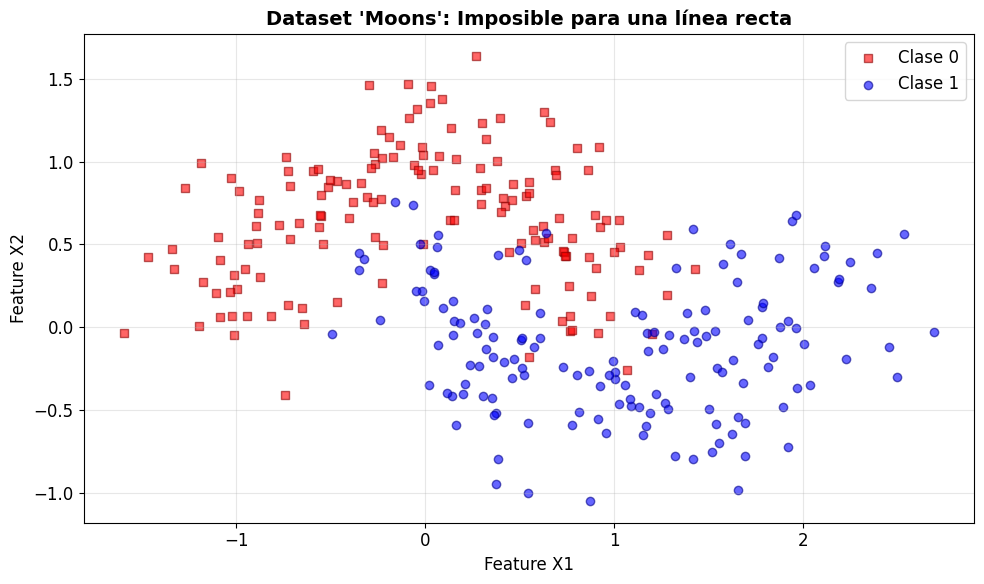

In [ ]:
# Generamos el dataset "Moons" - Un clásico para demostrar no linealidad
X, y = make_moons(n_samples=N_SAMPLES, noise=NOISE, random_state=RANDOM_STATE)

# Visualización del dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red',
            marker='s', alpha=0.6, label='Clase 0', edgecolors='darkred')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue',
            marker='o', alpha=0.6, label='Clase 1', edgecolors='darkblue')
plt.title("Dataset 'Moons': Imposible para una línea recta",
          fontsize=14, fontweight='bold')
plt.xlabel("Feature X1")
plt.ylabel("Feature X2")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### 1.1 Intento con Regresión Logística
Veamos cómo **falla estrepitosamente** al intentar separar las clases con una frontera lineal.

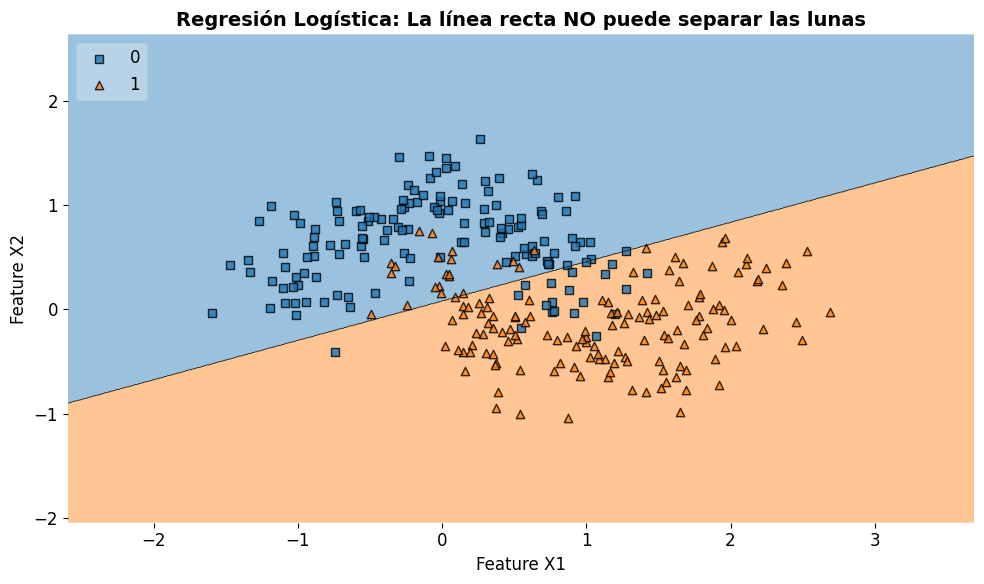

📊 Accuracy Regresión Logística: 85.67%


In [ ]:
# Entrenamos Regresión Logística (modelo lineal)
lr = LogisticRegression(random_state=RANDOM_STATE)
lr.fit(X, y)

# Visualizamos la frontera de decisión
plt.figure(figsize=(10, 6))
plot_decision_regions(X, y, clf=lr, legend=2)
plt.title("Regresión Logística: La línea recta NO puede separar las lunas",
          fontsize=14, fontweight='bold')
plt.xlabel("Feature X1")
plt.ylabel("Feature X2")
plt.tight_layout()
plt.show()

# Accuracy de referencia
print(f"📊 Accuracy Regresión Logística: {lr.score(X, y):.2%}")


> **⚠️ Real-World Warning: No todo es lineal**
>
> En la vida real, muchos problemas tienen relaciones no lineales entre variables:
> - **Detección de fraude:** Patrones complejos de comportamiento
> - **Diagnóstico médico:** Interacciones entre síntomas
> - **Segmentación de clientes:** Comportamientos que no siguen una línea
>
> Cuando Regresión Logística tiene accuracy bajo (~85% en datos "fáciles"), es una señal de que necesitas algoritmos más expresivos.

---
## 2. Árboles de Decisión (CART) 🌳

Los **Árboles de Decisión** son algoritmos que aprenden reglas de decisión tipo "si-entonces" directamente de los datos.

**¿Cómo funcionan?**
- Hacen **cortes rectangulares** perpendiculares a los ejes
- Cada nodo representa una pregunta: "¿X1 > 0.5?"
- Las hojas contienen las predicciones finales

**Ventajas:**
- ✅ Interpretables (puedes explicar cada decisión)
- ✅ No requieren escalado de datos
- ✅ Capturan no linealidades

**Desventajas:**
- ❌ Propensos al **overfitting** si no se controlan
- ❌ Fronteras "escalonadas" (solo cortes rectangulares)

### 2.1 Árbol sin restricciones (El problema del Overfitting)

C:\Users\Theki\AppData\Local\Temp\ipykernel_45416\584419641.py:12: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\ProgramData\Anaconda3\envs\ml_pro\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


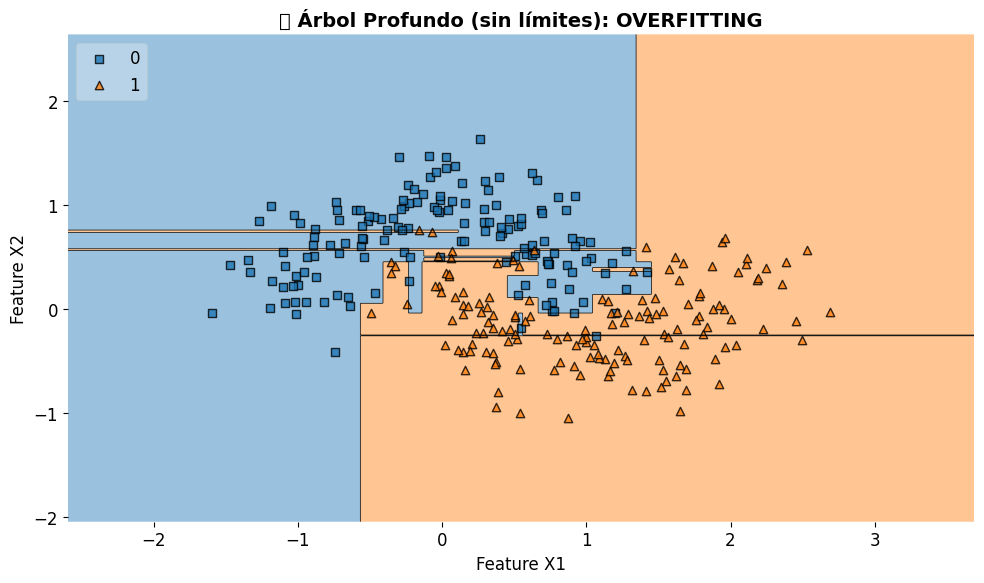

📊 Accuracy en Train: 100.00%
🌳 Profundidad del árbol: 9
🍃 Número de hojas: 33


In [ ]:
# ❌ ANTI-PATTERN: Árbol sin restricciones → OVERFITTING
tree_full = DecisionTreeClassifier(max_depth=None, random_state=RANDOM_STATE)
tree_full.fit(X, y)

# Visualizamos la frontera de decisión
plt.figure(figsize=(10, 6))
plot_decision_regions(X, y, clf=tree_full, legend=2)
plt.title("❌ Árbol Profundo (sin límites): OVERFITTING",
          fontsize=14, fontweight='bold')
plt.xlabel("Feature X1")
plt.ylabel("Feature X2")
plt.tight_layout()
plt.show()

# Métricas
print(f"📊 Accuracy en Train: {tree_full.score(X, y):.2%}")
print(f"🌳 Profundidad del árbol: {tree_full.get_depth()}")
print(f"🍃 Número de hojas: {tree_full.get_n_leaves()}")


> **💡 Pro-Tip: ¿Cómo detectar Overfitting?**
>
> Un árbol con `max_depth=None` puede crecer hasta que cada hoja tenga un solo ejemplo.
> Señales de overfitting:
> - Accuracy en train = 100% pero accuracy en test mucho menor
> - Fronteras de decisión "dentadas" que siguen el ruido
> - Muchas hojas con pocos ejemplos cada una
>
> **Regla de oro:** Si tu árbol tiene más hojas que √n (donde n = número de ejemplos), probablemente está memorizando.

### 2.2 Controlando el Árbol (Pruning / Poda)

La solución al overfitting es **limitar la complejidad** del árbol. Los hiperparámetros más importantes son:

| Parámetro | Descripción | Efecto |
|-----------|-------------|--------|
| `max_depth` | Profundidad máxima | Menos profundo = más simple |
| `min_samples_split` | Mínimo de muestras para dividir | Más alto = más conservador |
| `min_samples_leaf` | Mínimo de muestras en hojas | Evita hojas con 1-2 ejemplos |

C:\Users\Theki\AppData\Local\Temp\ipykernel_45416\863783167.py:16: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\ProgramData\Anaconda3\envs\ml_pro\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


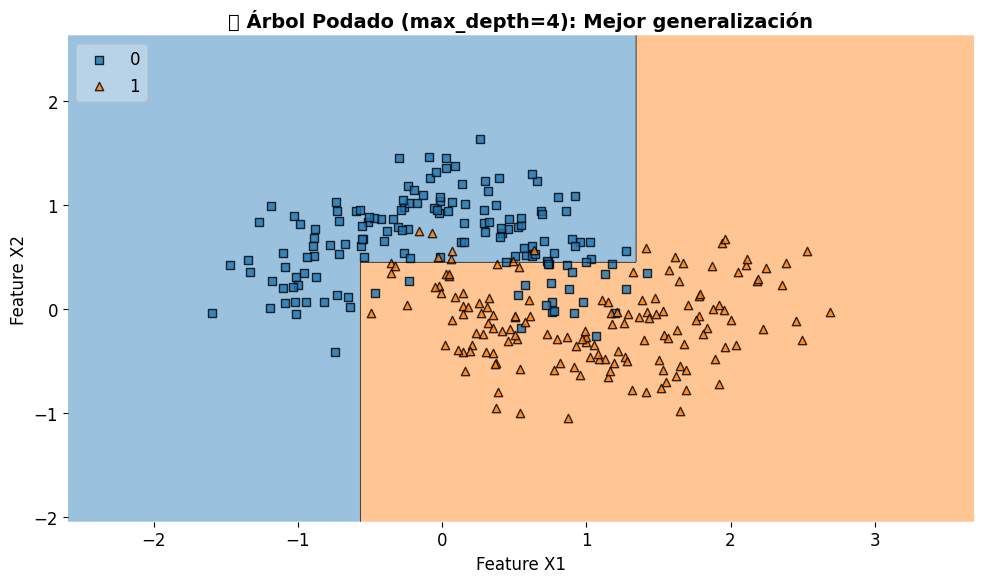

📊 Accuracy en Train: 90.00%
🌳 Profundidad del árbol: 4
🍃 Número de hojas: 10


In [ ]:
# ✅ SOLUCIÓN: Árbol con restricciones → GENERALIZACIÓN
tree_pruned = DecisionTreeClassifier(
    max_depth=4,              # Limitamos profundidad
    min_samples_leaf=5,       # Mínimo 5 muestras por hoja
    random_state=RANDOM_STATE
)
tree_pruned.fit(X, y)

# Visualizamos la frontera de decisión
plt.figure(figsize=(10, 6))
plot_decision_regions(X, y, clf=tree_pruned, legend=2)
plt.title("✅ Árbol Podado (max_depth=4): Mejor generalización",
          fontsize=14, fontweight='bold')
plt.xlabel("Feature X1")
plt.ylabel("Feature X2")
plt.tight_layout()
plt.show()

# Métricas
print(f"📊 Accuracy en Train: {tree_pruned.score(X, y):.2%}")
print(f"🌳 Profundidad del árbol: {tree_pruned.get_depth()}")
print(f"🍃 Número de hojas: {tree_pruned.get_n_leaves()}")


### 2.3 Visualizando la Estructura del Árbol

Una de las grandes ventajas de los árboles es su **interpretabilidad**. Podemos visualizar exactamente qué reglas aprendió:

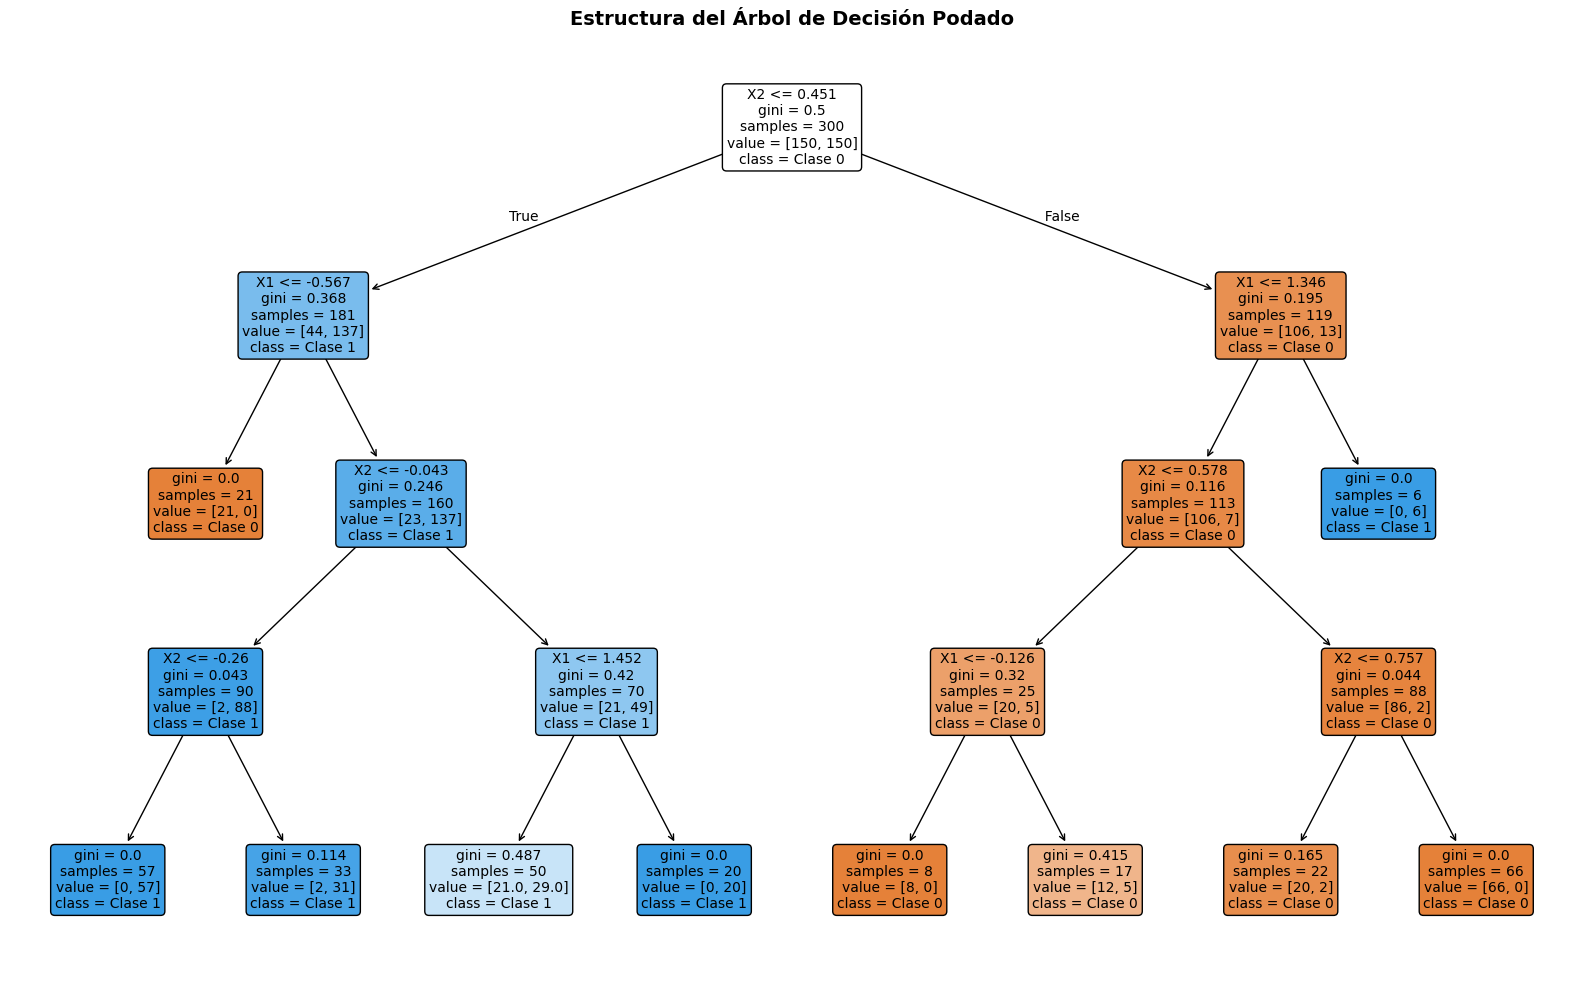

In [ ]:
# Visualización de la estructura del árbol
plt.figure(figsize=(16, 10))
plot_tree(
    tree_pruned,
    filled=True,                              # Colorear nodos según clase
    feature_names=['X1', 'X2'],               # Nombres de features
    class_names=['Clase 0', 'Clase 1'],       # Nombres de clases
    rounded=True,                             # Bordes redondeados
    fontsize=10
)
plt.title("Estructura del Árbol de Decisión Podado",
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


### 🧠 Micro-Desafío: Experimenta con la Poda

Cambia los hiperparámetros del árbol podado y observa cómo cambian las fronteras:

1. Prueba con `max_depth=2` y `max_depth=6`
2. Cambia `min_samples_leaf` a 1 y luego a 20

**Preguntas para reflexionar:**
- ¿Qué pasa con las fronteras cuando aumentas `max_depth`?
- ¿Qué pasa cuando `min_samples_leaf` es muy alto?
- ¿Cuál configuración crees que generalizará mejor en datos nuevos?

---
## 3. Random Forest (Bagging) 🌲🌲🌲

**El problema:** Un solo árbol es inestable. Pequeños cambios en los datos pueden producir árboles muy diferentes.

**La solución: Random Forest** - En lugar de un árbol, entrenamos **muchos árboles** y promediamos sus predicciones.

**¿Cómo funciona?**
1. **Bootstrap:** Cada árbol se entrena con una muestra aleatoria (con reemplazo) de los datos
2. **Random Features:** En cada división, solo considera un subconjunto aleatorio de features
3. **Votación:** La predicción final es el voto mayoritario de todos los árboles

**Ventajas:**
- ✅ Reduce overfitting (promedia el ruido)
- ✅ Fronteras más suaves
- ✅ Robusto a outliers

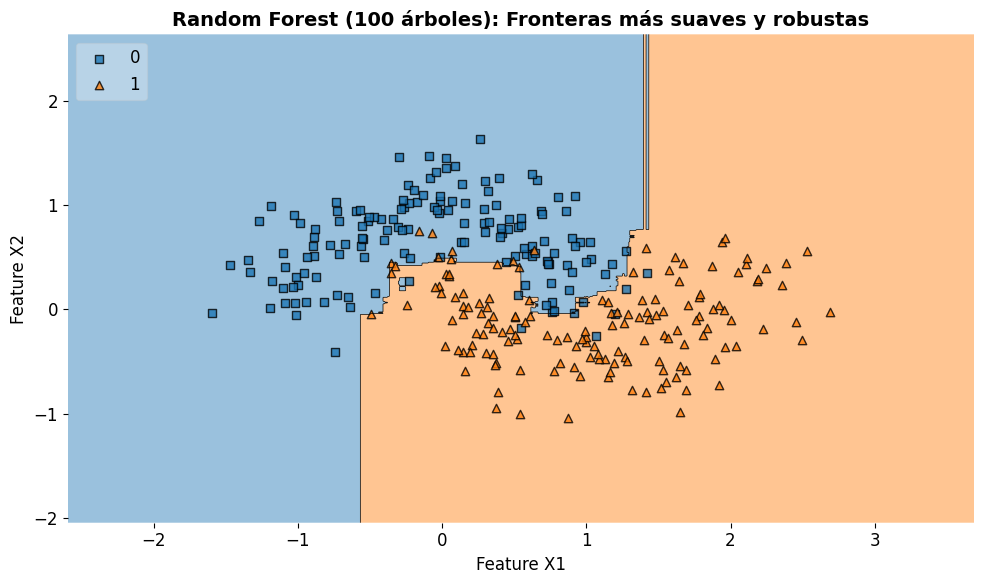

📊 Accuracy en Train: 95.67%
🌲 Número de árboles: 100


In [ ]:
# Random Forest: El poder de los ensembles
rf = RandomForestClassifier(
    n_estimators=100,         # 100 árboles
    max_depth=5,              # Cada árbol con profundidad limitada
    min_samples_leaf=3,
    random_state=RANDOM_STATE,
    n_jobs=-1                 # Usar todos los cores
)
rf.fit(X, y)

# Visualizamos la frontera de decisión
plt.figure(figsize=(10, 6))
plot_decision_regions(X, y, clf=rf, legend=2)
plt.title("Random Forest (100 árboles): Fronteras más suaves y robustas",
          fontsize=14, fontweight='bold')
plt.xlabel("Feature X1")
plt.ylabel("Feature X2")
plt.tight_layout()
plt.show()

# Métricas
print(f"📊 Accuracy en Train: {rf.score(X, y):.2%}")
print(f"🌲 Número de árboles: {rf.n_estimators}")


> **💡 Pro-Tip: ¿Cuántos árboles usar?**
>
> - **Regla general:** 100-500 árboles suele ser suficiente
> - **Más árboles = Más estabilidad** pero también más tiempo de entrenamiento
> - La métrica OOB (Out-of-Bag) te permite estimar el error sin necesidad de un set de validación separado
> - Usa `n_jobs=-1` para paralelizar el entrenamiento en todos los cores disponibles

---
## 4. SVM (Support Vector Machines) 🎯

**SVM** es un algoritmo que busca el **hiperplano óptimo** que maximiza el margen entre clases.

**El Kernel Trick:**
- En su forma básica, SVM también es lineal
- Pero con **kernels** (como RBF), proyecta los datos a un espacio de mayor dimensión donde SÍ son linealmente separables
- Luego traza la frontera en ese espacio y la "proyecta de vuelta"

**El resultado:** Fronteras de decisión **curvas y suaves**, matemáticamente elegantes.

**Hiperparámetros clave:**
| Parámetro | Descripción |
|-----------|-------------|
| `kernel` | Tipo de transformación ('linear', 'rbf', 'poly') |
| `C` | Penalización por errores (más alto = fronteras más ajustadas) |
| `gamma` | Alcance de influencia de cada punto (solo para RBF) |

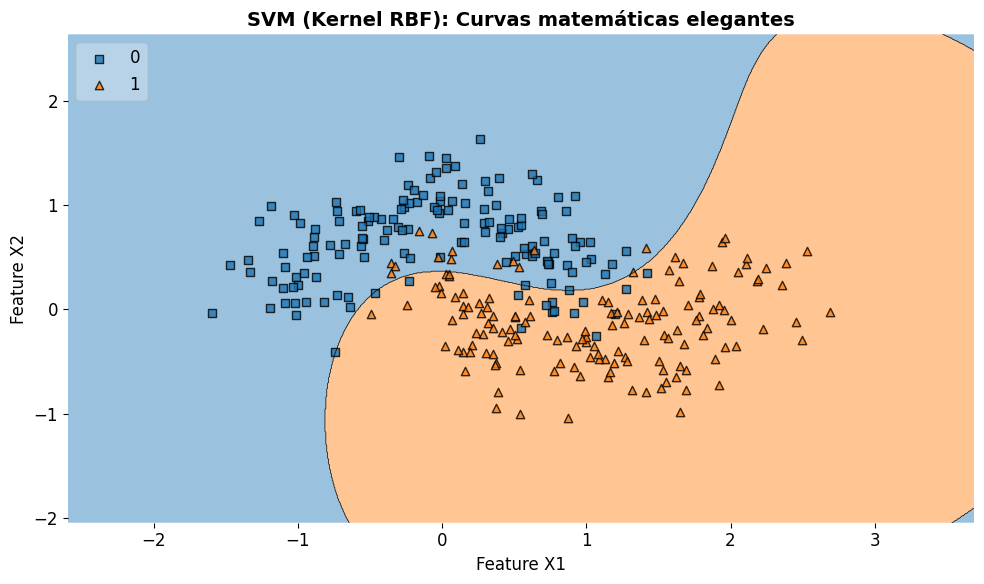

📊 Accuracy en Train: 90.67%
🎯 Support Vectors: 99 de 300 puntos


In [ ]:
# SVM con Kernel RBF (Radial Basis Function)
svm = SVC(
    kernel='rbf',           # Kernel Gaussiano
    C=1.0,                  # Regularización
    gamma=0.5,              # Alcance del kernel
    random_state=RANDOM_STATE
)
svm.fit(X, y)

# Visualizamos la frontera de decisión
plt.figure(figsize=(10, 6))
plot_decision_regions(X, y, clf=svm, legend=2)
plt.title("SVM (Kernel RBF): Curvas matemáticas elegantes",
          fontsize=14, fontweight='bold')
plt.xlabel("Feature X1")
plt.ylabel("Feature X2")
plt.tight_layout()
plt.show()

# Métricas
print(f"📊 Accuracy en Train: {svm.score(X, y):.2%}")
print(f"🎯 Support Vectors: {svm.n_support_.sum()} de {len(X)} puntos")


> **⚠️ Real-World Warning: SVM y el Escalado**
>
> A diferencia de los árboles, **SVM es muy sensible a la escala de los datos**.
> - Features con rangos grandes dominarán el cálculo de distancias
> - **SIEMPRE** escala tus datos antes de usar SVM (StandardScaler o MinMaxScaler)
> - En este ejemplo no escalamos porque `make_moons` ya genera datos en rangos similares

### 🧠 Micro-Desafío: El efecto de Gamma

Experimenta con diferentes valores de `gamma` en SVM:
- `gamma=0.1` (bajo) - Influencia amplia
- `gamma=5.0` (alto) - Influencia muy local

**Pregunta:** ¿Qué pasa con las fronteras cuando gamma es muy alto? ¿Se parece a algo que ya vimos?

---
## 5. Comparación Final 📊

Comparemos visualmente todos los modelos en una sola figura:

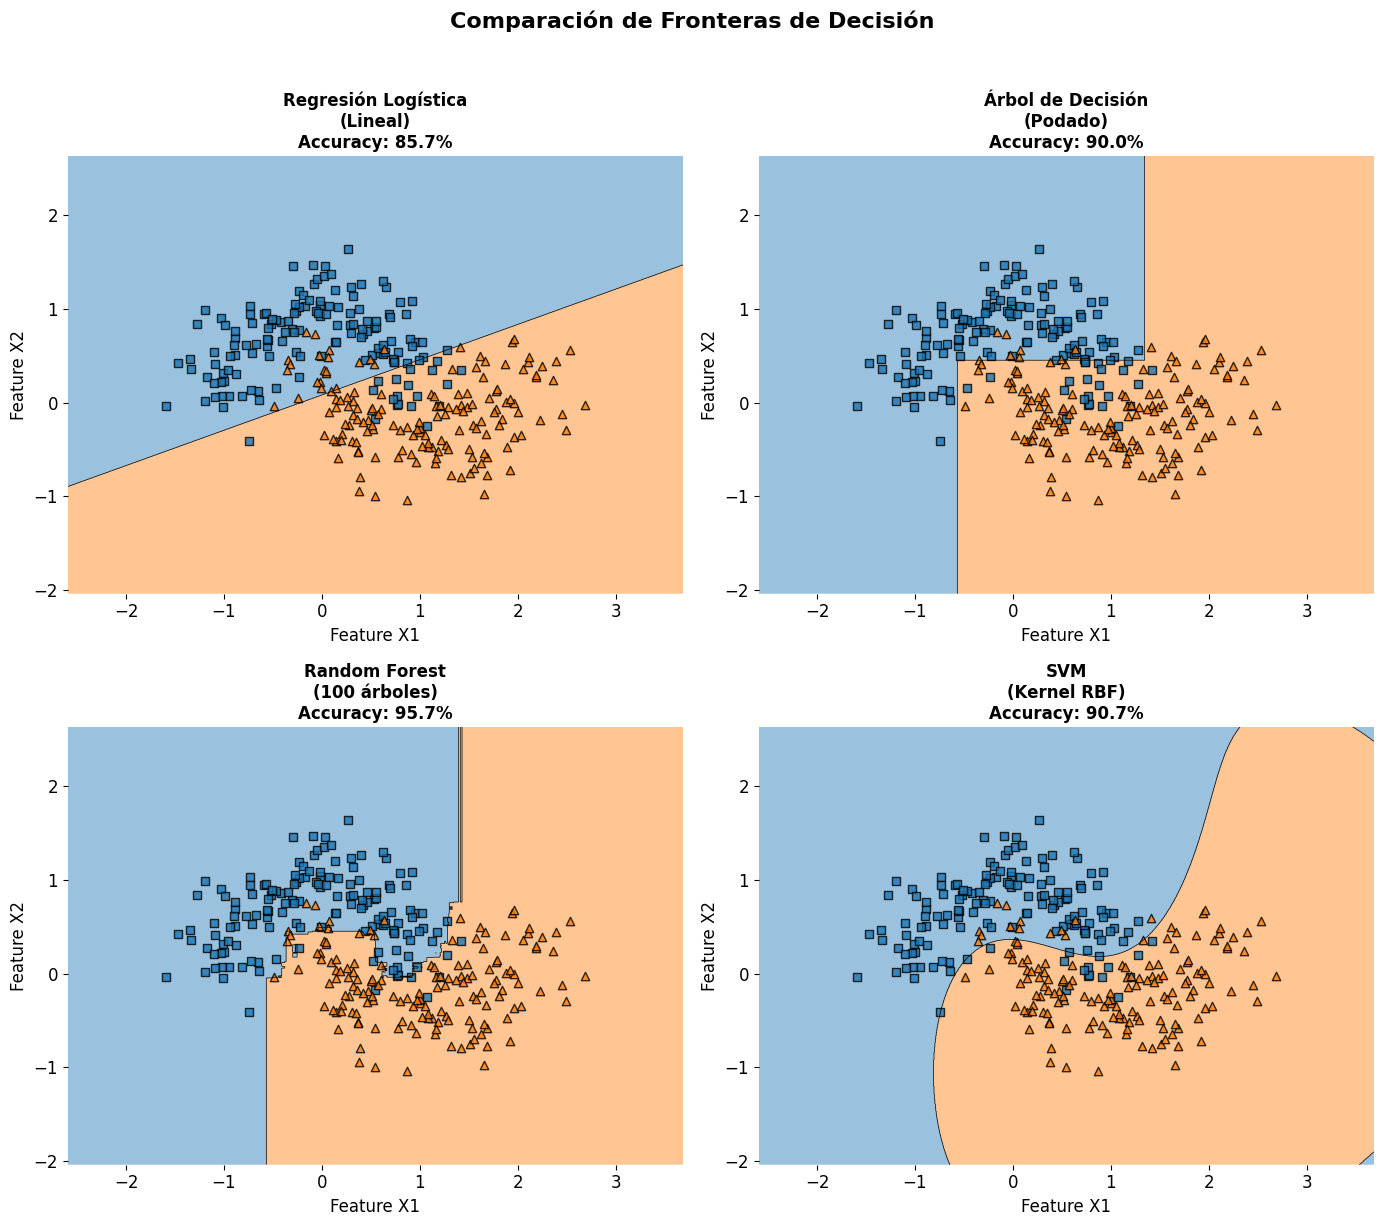

In [ ]:
# Comparación visual de todos los modelos
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

models = [
    (lr, "Regresión Logística\n(Lineal)"),
    (tree_pruned, "Árbol de Decisión\n(Podado)"),
    (rf, "Random Forest\n(100 árboles)"),
    (svm, "SVM\n(Kernel RBF)")
]

for ax, (model, title) in zip(axes.ravel(), models):
    plt.sca(ax)
    plot_decision_regions(X, y, clf=model, legend=0)
    ax.set_title(f"{title}\nAccuracy: {model.score(X, y):.1%}",
                 fontsize=12, fontweight='bold')
    ax.set_xlabel("Feature X1")
    ax.set_ylabel("Feature X2")

plt.suptitle("Comparación de Fronteras de Decisión",
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


In [ ]:
# Tabla resumen de características
import pandas as pd

comparison_data = {
    'Modelo': ['Regresión Logística', 'Árbol de Decisión', 'Random Forest', 'SVM (RBF)'],
    'Accuracy': [f"{lr.score(X, y):.1%}", f"{tree_pruned.score(X, y):.1%}",
                 f"{rf.score(X, y):.1%}", f"{svm.score(X, y):.1%}"],
    'Tipo de Frontera': ['Lineal', 'Rectangular', 'Suave (promedio)', 'Curva (kernel)'],
    'Interpretable': ['✅ Sí', '✅ Sí', '⚠️ Parcial', '❌ No'],
    'Requiere Escalado': ['⚠️ Recomendado', '❌ No', '❌ No', '✅ Obligatorio']
}

df_comparison = pd.DataFrame(comparison_data)
print("📊 Resumen Comparativo de Modelos:")
print("=" * 80)
print(df_comparison.to_string(index=False))


📊 Resumen Comparativo de Modelos:
             Modelo Accuracy Tipo de Frontera Interpretable Requiere Escalado
Regresión Logística    85.7%           Lineal          ✅ Sí    ⚠️ Recomendado
  Árbol de Decisión    90.0%      Rectangular          ✅ Sí              ❌ No
      Random Forest    95.7% Suave (promedio)    ⚠️ Parcial              ❌ No
          SVM (RBF)    90.7%   Curva (kernel)          ❌ No     ✅ Obligatorio


---
## 🏆 Resumen de Logros

¡Excelente trabajo! En este notebook has aprendido:

1. **Limitaciones de la Linealidad:** Viste cómo la Regresión Logística falla cuando los datos no son linealmente separables.

2. **Árboles de Decisión:** Aprendiste que hacen cortes rectangulares y que sin restricciones sufren de overfitting severo.

3. **Importancia de la Poda:** Controlar `max_depth` y `min_samples_leaf` es crucial para que el árbol generalice.

4. **Poder de los Ensembles:** Random Forest suaviza las fronteras promediando muchos árboles "imperfectos".

5. **El Kernel Trick:** SVM puede crear fronteras curvas elegantes proyectando los datos a espacios de mayor dimensión.

**Lección clave:** No existe el "mejor modelo universal". La elección depende de:
- La naturaleza de tus datos
- La necesidad de interpretabilidad
- Los recursos computacionales disponibles

---
## 👉 Siguiente Paso

Ahora que entiendes visualmente cómo funcionan estos algoritmos, en el **próximo notebook** los aplicaremos a un **dataset real de Credit Scoring** con muchas más features.

Veremos:
- Cómo construir **Pipelines** con estos modelos
- **Feature Importance** en árboles y Random Forest
- **XGBoost** y el poder del Gradient Boosting
- Comparación sistemática con métricas de clasificación

---
*Notebook desarrollado para el curso de Machine Learning Supervisado - PECD UNI*